In [13]:
import pandas as pd
import numpy as np
import scipy as sp
from tqdm import tqdm
tqdm.pandas()
from dateutil.relativedelta import relativedelta
pd.set_option("display.max_columns", None)
from dateutil.relativedelta import relativedelta
from itertools import accumulate

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import seaborn as sns

# Date format = "%Y-%m-%d" @ datetime type

In [2]:
mainDirect0 = pd.read_csv("Main_Director_COMPLETE v170325.csv", index_col = 0)    # Manager level data from 2006 to 2024

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_17668\3590503210.py:1: DtypeWarning: Columns (15,16,17,27,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  mainDirect0 = pd.read_csv("Main_Director_COMPLETE v170325.csv", index_col = 0)    # Manager level data from 2006 to 2024


In [16]:
mainDirect0.loc[ mainDirect0["NumSkills"] == 0].count()

Symbol            87002
Company           87002
AsOnDate          87002
AsOnYear          87002
ISIN              86977
                  ...  
FactorLoading2    87002
FactorLoading3    87002
FactorLoading4    87002
FactorLoading5    87002
Eigenvalue        87002
Length: 181, dtype: int64

In [20]:
mainDirect0["AsOnDate"] = pd.to_datetime(mainDirect0["AsOnDate"], format = "%Y-%m-%d")
                                         
filteredMain = mainDirect0[ mainDirect0["AsOnDate"] >= "2013-03-31"].copy()

In [21]:
filteredMain.loc[ filteredMain["NumSkills"] == 0].count()

Symbol            45830
Company           45830
AsOnDate          45830
AsOnYear          45830
ISIN              45805
                  ...  
FactorLoading2    45830
FactorLoading3    45830
FactorLoading4    45830
FactorLoading5    45830
Eigenvalue        45830
Length: 181, dtype: int64

In [22]:
filteredMain

,Symbol,Company,AsOnDate,AsOnYear,ISIN,Person Code,Director Salutation,Director First Name,Director Middle Name,Director Surname,Date of Birth,Gender,Nationality,Member of Civil Services,Promoter Director (Yes/No),Position on Board,Independent (Yes/No),Education1,Education2,Education3,Education4,Education5,Education6,Education7,Education8,Education9,Education10,Skills/Competencies,Occupation,Cessation Reason,Other Directorship 1,Other Directorship 2,Other Directorship 3,Other Directorship 4,Other Directorship 5,Other Directorship 6,Other Directorship 7,Other Directorship 8,Other Directorship 9,Other Directorship 10,Other Directorship 11,Other Directorship 12,Other Directorship 13,Other Directorship 14,Other Directorship 15,Brief Profile,Tenure Valid till,Indep,Appointment Date,Cessation Date,PrevLastServed,NextServed,CessationDummy,ReappointDummy,TermStartDummy,TermNumber,CumOpBalUnc,CumOpBalIndep,CumOpBalNonIndep,CumCloBalUnc,CumCloBalIndep,CumCloBalNonIndep,TermOpBalUnc,TermOpBalIndep,TermOpBalNonIndep,TermOpBalTotal,TermCloBalUnc,TermCloBalIndep,TermCloBalNonIndep,TermCloBalTotal,CompOpBalUnc,CompOpBalIndep,CompOpBalNonIndep,CompOpBalTotal,CompCloBalUnc,CompCloBalIndep,CompCloBalNonIndep,CompCloBalTotal,CloBalTotalXP,CountOtherPastUnclearA,CountOtherPastIndepA,CountOtherPastNonIndepA,CompCountOtherPastTotalA,CountOtherPastUnclearAB,CountOtherPastIndepAB,CountOtherPastNonIndepAB,CompCountOtherPastTotalAB,CountCurrUnclearA,CountCurrIndepA,CountCurrNonIndepA,CompCountCurrTotalA,CountCurrUnclearAB,CountCurrIndepAB,CountCurrNonIndepAB,CompCountCurrTotalAB,Rookie,IsIndep,IsNonIndep,IsRookie,IsNonRookie,IsCeoMDPosition,IsChairmanPosition,IsCeoMDOccupation,IsChairmanOccupation,IsCeoMD,IsChairman,IsPromoterClassification,IsPromoterBoard,IsPromoter,IsDualityChairmanMD,IsFamilyManager,IsFamilyChairman,IsFamilyChairmanAndCEO,IsRookieIndep,IsRookieNonIndep,IsNonRookieIndep,IsNonRookieNonIndep,IsFemale,Age,TenureInYearsinCompIndep,TenureInYearsinCompTotal,IsFirstTerm,IsFirstTermIndep,IsOneYear,IsOneYearIndep,IsTwoYear,IsTwoYearIndep,IsThreeYear,IsThreeYearIndep,IsRetires5y,IsTermLimitRetirement,IsDefaultTerm,IsBusy,IsTurnOver,HasRetires5y,HasTermLimitRetirement,IsTurnOverIndep,Company Name,Prowess company code,Entity type,Entity type code,Incorporation year,Industry group,Industry group code,NIC name,NIC code,Ownership group code,Ownership group,Age group,NSE symbol,Head office address,EducationAll,IsMBA,IsPhD,HasFinanceXP,HasTechXP,HasRelatedIndustryXP,HasExecXP,PublicExecXPDummy,PrivateExecXPDummy,HasPublicExecXP,HasPrivateExecXP,HasTechSkill,HasFinanceSkill,NumSkills,NumFirmsPast,NumIndustryPast,HasCeoMDChairXP,HasConglomerateXP,NumSkillsScaled,NumFirmsPastScaled,NumIndustryPastScaled,HasCeoMDChairXPScaled,HasConglomerateXPScaled,General Ability Index,FactorLoading1,FactorLoading2,FactorLoading3,FactorLoading4,FactorLoading5,Eigenvalue
73113,20MICRONS,20 MICRONS LTD.,2013-03-31,2013,INE144J01027,P00027633,MR.,RAMKISHAN,AMIRCHAND,DEVIDAYAL,1950-12-08,M,INDIA,NONE,NO,NON-EXECUTIVE DIRECTOR,YES,POST GRADUATE: M.B.A.,"POST GRADUATE: M.COM.,MAHARAJA SAYAJIRAO UNIVE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ACCOUNTS/AUDIT/TAXATION,CONSUMER DISCRETIONARY...",NaN,NaN,20 MICRONS LTD.,BANCO PRODUCTS (INDIA) LTD.,MUNJAL AUTO INDUSTRIES LTD.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MR.RAM DEVIDAYAL HAS A MASTER'S DEGREE IN COMM...,NaN,Y,2007-10-13,NaN,2012-03-31,2014-03-31,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,365.0,0.0,1631.0,0.0,0.0,1631.0,1631.0,365.0,0.0,1996.0,1631.0,0.0,0.0,1631.0,1631.0,365.0,0.0,1996.0,4259,3,0,0,3,3,0,0,3,0,3,0,3,0,3,0,3,N,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,74.0,1.000000,5.468493,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,20 Microns Ltd.,11.0,Public Ltd.,1.020302e+10,1987.0,Minerals,1.010203e+14,Other mining and quarrying,8.0,2.010104e+10,20 Microns Group,Between 1986 and 1990,20MICRONS,"347, G I D C Industrial Estate, Waghodia, Vad...","POST GRADUATE: M.B.A. POST GRADUATE: M.COM.,MA...",1,0,0,0,1,0,0,0,0,0,1,1,15,3,3,0,1,1.4754

In [18]:
mainDirect0["AsOnDate"]

0         2006-03-31
1         2006-03-31
2         2006-03-31
3         2006-03-31
4         2006-03-31
             ...    
259413    2024-03-31
259414    2024-03-31
259415    2024-03-31
259416    2024-03-31
259417    2024-03-31
Name: AsOnDate, Length: 259418, dtype: object

In [10]:
mainDirect0["NumFirmsPast"]

0         0
1         0
2         0
3         0
4         0
         ..
259413    3
259414    3
259415    1
259416    1
259417    1
Name: NumFirmsPast, Length: 259418, dtype: int64

In [7]:
mainDirect0["CloBalTotalXP"]

0         1345
1         3287
2         3287
3         3287
4         3287
          ... 
259413    9732
259414    9732
259415    3242
259416    1885
259417    1823
Name: CloBalTotalXP, Length: 259418, dtype: int64

C:\Users\SHIVAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


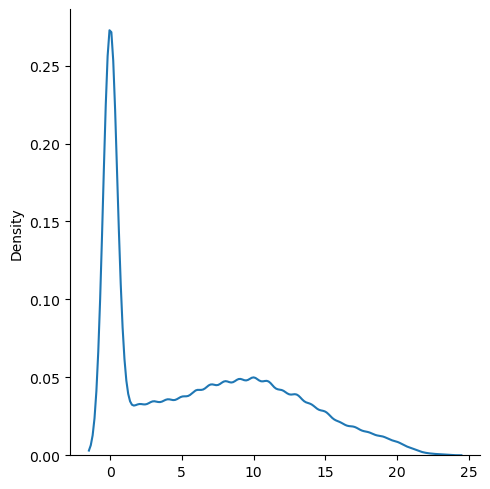

In [14]:
sns.displot(data = list(mainDirect0["NumSkills"].astype(int)), kind = "kde")